In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
occ_ensemble_probas = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step2/occipital/ensemble_models/full_ensemble_mean_probas.csv")
occ_ensemble_probas.sort_index(inplace=True)

true_labels = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/schiz/crops/2mm/OCCIPITAL/mask/Rskeleton_subject.csv")
true_labels['label'] = occ_ensemble_probas.labels.values
true_labels

,Subject,label
0,10171,0
1,10189,0
2,10193,0
3,10206,0
4,10217,0
...,...,...
1287,st110288,0
1288,va110289,0
1289,ye110322,0
1290,yh100442,0


In [3]:
# get the skeletons

Rskels = np.load("/neurospin/dico/data/deep_folding/current/datasets/schiz/crops/2mm/OCCIPITAL/mask/Rskeleton.npy")[...,0]
Lskels = np.load("/neurospin/dico/data/deep_folding/current/datasets/schiz/crops/2mm/OCCIPITAL/mask/Lskeleton.npy")[...,0]

print(Rskels.shape, Lskels.shape)

R_voxels = []
L_voxels = []

for i in range(Rskels.shape[0]):
    Rskel = Rskels[i]
    Lskel = Lskels[i]
    R_voxels.append(np.count_nonzero(Rskel))
    L_voxels.append(np.count_nonzero(Lskel))

R_voxels = np.array(R_voxels)
L_voxels = np.array(L_voxels)

(1292, 38, 34, 50) (1292, 38, 51, 60)


## Disparités

[98, 99, 100, 101, 102] [0, 1, 2, 3, 4]


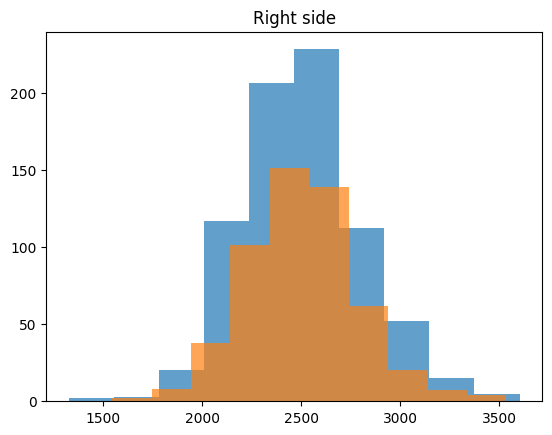

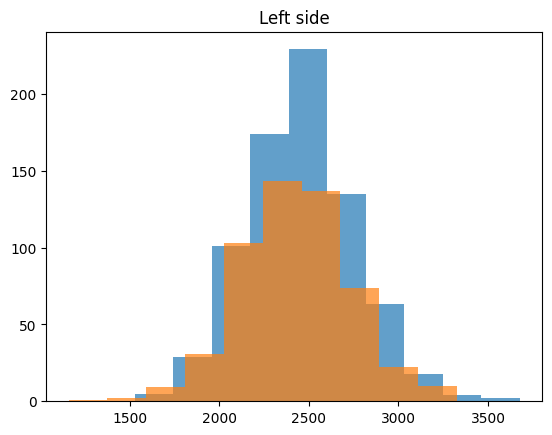

In [4]:
no_schiz = list(true_labels[true_labels.label == 0].index.values)
schiz = list(true_labels[true_labels.label == 1].index.values)
print(schiz[:5], no_schiz[:5])


opacity = 0.7
plt.hist(R_voxels[no_schiz], alpha=opacity)
plt.hist(R_voxels[schiz], alpha=opacity)
plt.title("Right side")
plt.show()
plt.hist(L_voxels[no_schiz], alpha=opacity)
plt.hist(L_voxels[schiz], alpha=opacity)
plt.title("Left side")
plt.show()

Pas de disparité en nombre de voxels entre schiz et non schiz à première vue.

### Disparité en fonction de la prédiction du modèle d'ensemble

In [5]:
# get the best classification threshold for the ensemble model

min_interval, max_interval = occ_ensemble_probas.agg_mean2.min(), occ_ensemble_probas.agg_mean2.max()
n_steps = 10000
h = (max_interval - min_interval) / n_steps
accuracies = np.zeros(n_steps)

for i in range(1, n_steps):
    threshold = min_interval + i*h
    # compute accuracy
    predictions = occ_ensemble_probas.agg_mean2 >= threshold
    accuracies[i] = (occ_ensemble_probas.labels == predictions).mean()

# get the argmax of accuracies
best_i = np.argmax(accuracies)
best_threshold = min_interval + best_i*h
print(best_i, best_threshold, accuracies[best_i])

7185 0.3924462891324498 0.6238390092879257


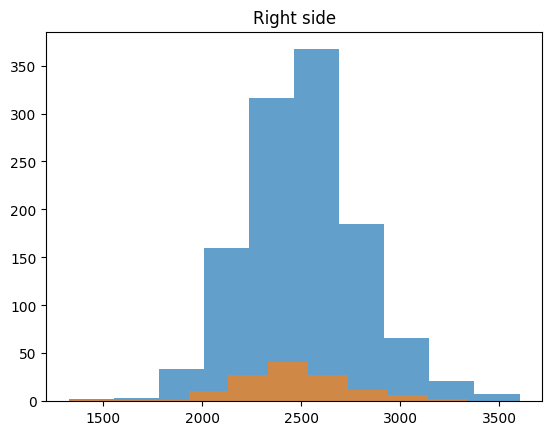

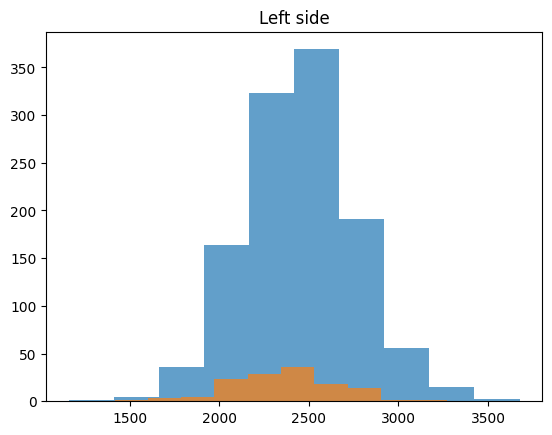

In [6]:
occ_ensemble_probas['pred'] = np.where(occ_ensemble_probas.agg_mean2 <= best_threshold, 0, 1)


pred_no_schiz = list(occ_ensemble_probas[occ_ensemble_probas.pred == 0].index.values)
pred_schiz = list(occ_ensemble_probas[occ_ensemble_probas.pred == 1].index.values)


opacity = 0.7
plt.hist(R_voxels[pred_no_schiz], alpha=opacity)
plt.hist(R_voxels[pred_schiz], alpha=opacity)
plt.title("Right side")
plt.show()
plt.hist(L_voxels[pred_no_schiz], alpha=opacity)
plt.hist(L_voxels[pred_schiz], alpha=opacity)
plt.title("Left side")
plt.show()

## Individus extrêmes

In [11]:
smol_skel_idx = R_voxels.argmin()
subject = true_labels.loc[smol_skel_idx,'Subject']
print(subject)

smol_skel_idx = L_voxels.argmin()
subject = true_labels.loc[smol_skel_idx,'Subject']
print(subject)

A00027391
INVLM0PXNDE
